# Лабораторная работа №2
Построить бассейны приятяжения аттракторов двумерного дискретного отображения $ (x_{n+1}, y_{n+1}) = (2.66-x_n^2+0.3y_n, x_n) $, где $x_0 \in (-3,3), \ y_0 \in (-3,3)$, если известно, что одним из аттракторов является точка на бесконечности. Определить тип второго аттрактора, построить его фазовый портрет и рассчитать его показатели Ляпунова.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def discrete_map(x, y):
    return 2.66 - x**2+0.3*y, x

In [3]:
def get_values(x, y, iterations):
    for _ in range(iterations):
        x, y = discrete_map(x, y)
    return x, y

/tmp/ipykernel_182964/407336601.py:2: RuntimeWarning: overflow encountered in scalar power
  return 2.66 - x**2+0.3*y, x


Text(0.5, 1.0, 'Бассейны притяжения')

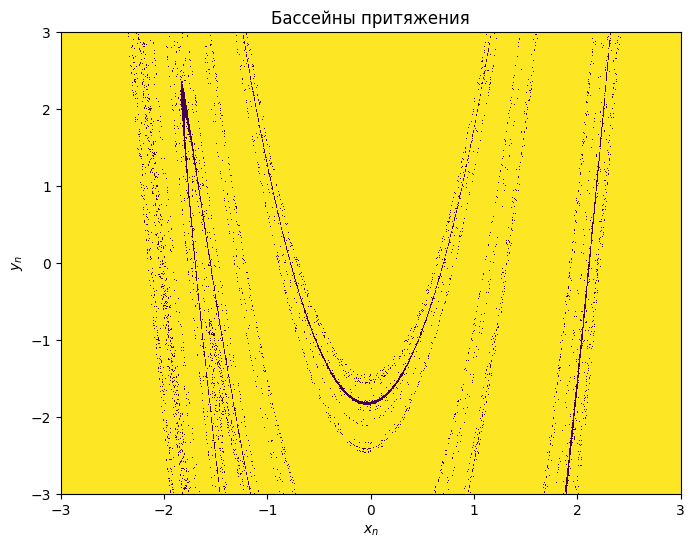

In [31]:
x0 = np.linspace(-3, 3, 2000)
y0 = np.linspace(-3, 3, 2000)

X, Y = np.meshgrid(x0, y0)

def is_attract_inf(x, y):
    x, y = get_values(x, y, 20)
    if np.abs(x) > 1000 or np.abs(y) > 1000:
        return 1
    return 0

attractors = np.zeros_like(X)

for i in range(X.shape[1]):
    for j in range(X.shape[0]):
        attractors[j, i] = is_attract_inf(x0[i], y0[j])

plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, attractors)
plt.xlabel('$x_n$')
plt.ylabel('$y_n$')
plt.title('Бассейны притяжения')

(-3.0, 3.0)

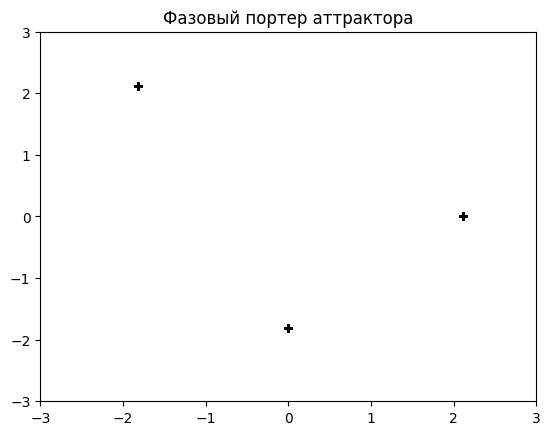

In [4]:
x = -1.78
y = 2

for i in range(7000):
  x, y = discrete_map(x, y)

for i in range(3000):
  x, y = discrete_map(x, y)
  plt.plot(x, y, marker = '+', color = 'k')
plt.title('Фазовый портер аттрактора')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

In [30]:
x = -1.78
y = 2

def J_iter(w, x):
  res = np.empty(2)
  res[0] = -2*x*w[0] - 0.3 * w[1]
  res[1] = w[0]
  return res

r_1 = []
r_2 = []

w1 = np.array([1, 0])
w2 = np.array([0, 1])
y1 = np.zeros(2)
y2 = np.zeros(2)

for i in range(7000):
  x, y = discrete_map(x, y)

n = 10000

for i in range(n):
  x, y = discrete_map(x, y)
  w1 = J_iter(w1, x)
  w2 = J_iter(w2, x)
  y1 = w1
  y2[0] = w2[0] - (y1[0]*w2[0] + y1[1]*w2[1])*y1[0] / (y1[0]**2 + y1[1]**2)
  y2[1] = w2[1] - (y1[0]*w2[0] + y1[1]*w2[1])*y1[1] / (y1[0]**2 + y1[1]**2)
  r_1 += [np.sqrt(y1[0]**2 + y1[1]**2)]
  r_2 += [np.sqrt(y2[0]**2 + y2[1]**2)]
  w1 = y1 / np.sqrt(y1[0]**2 + y1[1]**2)
  w2 = y2 / np.sqrt(y2[0]**2 + y2[1]**2)

L_1 = np.sum(np.log(r_1))/n
L_2 = np.sum(np.log(r_2))/n
print("lambda1 =", L_1)
print("lambda2 =", L_2)


lambda1 = -0.6017423494873217
lambda2 = -0.6022304548386144


Как мы видим, старший показатель Ляпунова меньше 0, значит аттрактор не хаотический. На фазовом портрете виден цикл из 3 точек, тип аттрактора -- предельный цикл (регулярный аттрактор).